In [22]:
# !pip install torch

In [1]:
words = open("rocities.txt", "r").read().splitlines()

In [2]:
words[:10]

['1 DECEMBRIE',
 '2 MAI',
 '23 AUGUST',
 'ABRAM',
 'ABRAMUT',
 'ABRUD',
 'ABRUD-SAT',
 'ABUCEA',
 'ABUD',
 'ABUS']

In [3]:
len(words)

10148

In [4]:
min(len(w) for w in words)

3

In [5]:
max(len(w) for w in words)

33

In [11]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [21]:
sorted(b.items(), key=lambda kv: -kv[1])[:10]

[(('I', '<E>'), 3726),
 (('A', '<E>'), 2515),
 (('T', 'I'), 2021),
 (('S', 'T'), 2005),
 (('E', 'S'), 1736),
 (('A', 'R'), 1653),
 (('N', 'I'), 1650),
 (('A', 'N'), 1520),
 (('<S>', 'C'), 1395),
 (('R', 'A'), 1316)]

In [23]:
import torch

In [61]:
chars = sorted(list(set(''.join(words))))
count_chars = len(chars)
stoi = {s: i for i,s in enumerate(chars)}
stoi['<S>'] = count_chars
stoi['<E>'] = count_chars + 1
count_all_chars = len(stoi.keys())
N = torch.zeros((count_all_chars+1, count_all_chars+1), dtype=torch.int32)

In [62]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [64]:
itos = {i: s for s,i in stoi.items()}

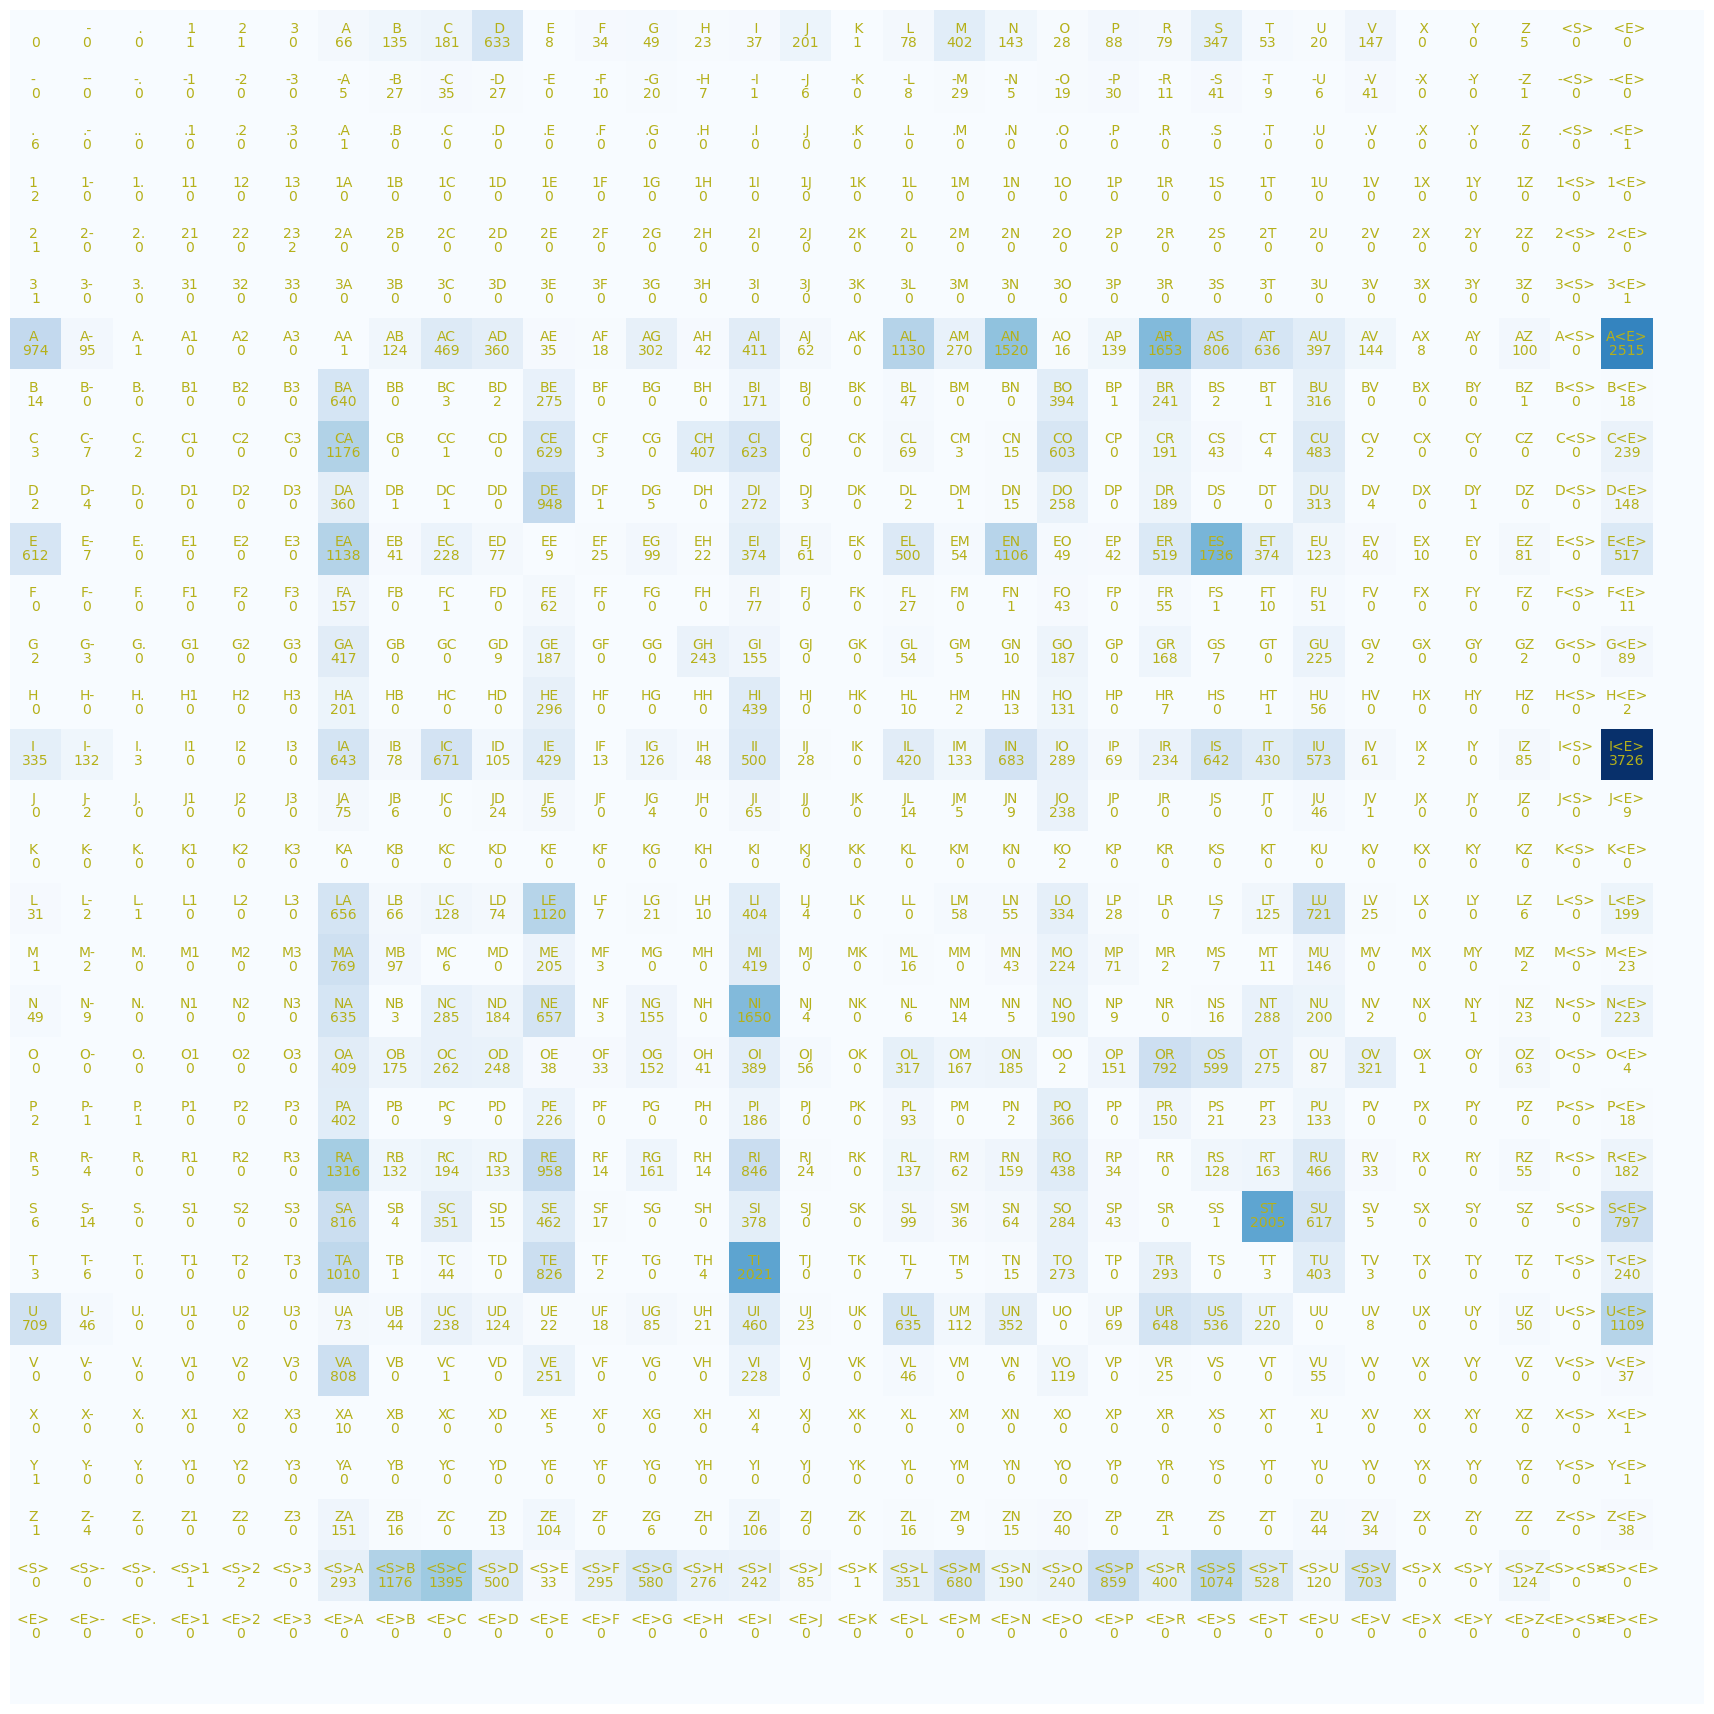

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(22,22))
plt.axis('off')
plt.imshow(N, cmap='Blues')
for i in range(count_all_chars):
    for j in range(count_all_chars):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr,ha='center',va='bottom',color='#b5b019')
        plt.text(j,i,N[i,j].item(),ha='center',va='top',color='#b5b019')